In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/euro-football-data-since-2012/__notebook_source__.ipynb
/kaggle/input/euro-football-data-since-2012/__notebook__.ipynb
/kaggle/input/euro-football-data-since-2012/Euro-Football_2012-2023.csv


# Notebook description:
1. Plotting the league teams according to the number of their participation in a particular season, starting from the 2012-2013 season (The order does not mean that it is 100% correct because some data is missing)
2. Search and plotting all matches and results of a specific team in a given season.
3. A detailed drawing of all the results of any team, and this drawing includes the number of goals, corners, and the total number of shots and shots on the goal in a given season.
4. Illustration of fouls and yellow and red cards for a specific team in the season.

# Import the data

In [2]:
df = pd.read_csv('/kaggle/input/euro-football-data-since-2012/Euro-Football_2012-2023.csv')
df.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,dkkXCXT5QHMYiCvDBUCJQC,England,Premier League,E0,2012-2013,18/08/12,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,dAmonz9YM7qKwwvBsSoJo5,England,Premier League,E0,2012-2013,18/08/12,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,YwUhmYU4naswHgTHQgNDaW,England,Premier League,E0,2012-2013,18/08/12,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,iEk9YuADjHNVFduiEEHXSK,England,Premier League,E0,2012-2013,18/08/12,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,bLQW9sPVeiPZA5bJN2jpW8,England,Premier League,E0,2012-2013,18/08/12,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


# Clean some data like drop id column and drop some null row of home and away teams

In [3]:
drop_index = []
for j in range(0,len(df)):
    if (pd.isnull(df['HomeTeam'][j]) == True) | (pd.isnull(df['FTHG'][j]) == True):
        drop_index.append(j)
df.drop(drop_index, axis=0, inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.drop('id', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047930 entries, 0 to 1047929
Data columns (total 26 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Country   1047930 non-null  object 
 1   League    1047930 non-null  object 
 2   Div       1047930 non-null  object 
 3   Season    1047930 non-null  object 
 4   Date      1047930 non-null  object 
 5   HomeTeam  1047930 non-null  object 
 6   AwayTeam  1047930 non-null  object 
 7   Referee   243925 non-null   object 
 8   FTHG      1047930 non-null  float64
 9   FTAG      1047930 non-null  float64
 10  FTR       1047930 non-null  object 
 11  HTHG      1044448 non-null  float64
 12  HTAG      1044448 non-null  float64
 13  HTR       1044448 non-null  object 
 14  HS        276465 non-null   float64
 15  AS        276465 non-null   float64
 16  HST       276465 non-null   float64
 17  AST       276465 non-null   float64
 18  HF        275127 non-null   float64
 19  AF        275127 non-

# Number of matches played according to countries and leagues

England        170822
Spain          149990
Italy          136914
France         134993
Germany        109170
Scotland        74784
Turkey          59036
Belgium         58300
Netherlands     55221
Portugal        54423
Greece          44277
Name: Country, dtype: int64


<AxesSubplot:>

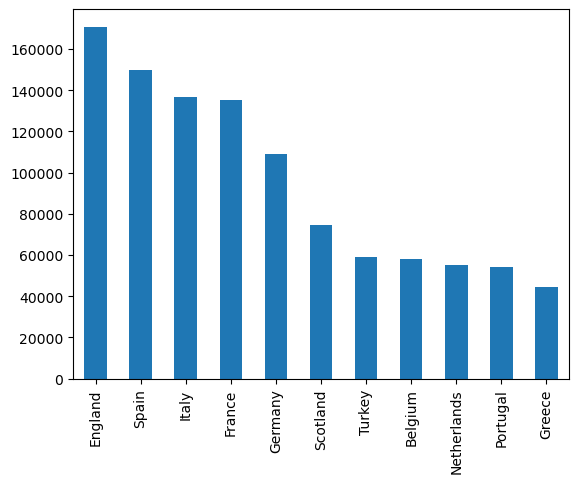

In [5]:
c = df['Country'].value_counts()
print(c)
c.plot(kind='bar')

Premier League       108582
Championship         103542
Segunda Division      84199
Serie B               70151
Le Championnat        67553
Division 2            67440
Serie A               66763
Primera Division      65791
Futbol Ligi 1         59036
Jupiler League        58300
Eredivisie            55221
Bundesliga 1          54585
Bundesliga 2          54585
Liga I                54423
Ethniki Katigoria     44277
Division 1            33482
Name: League, dtype: int64


<AxesSubplot:>

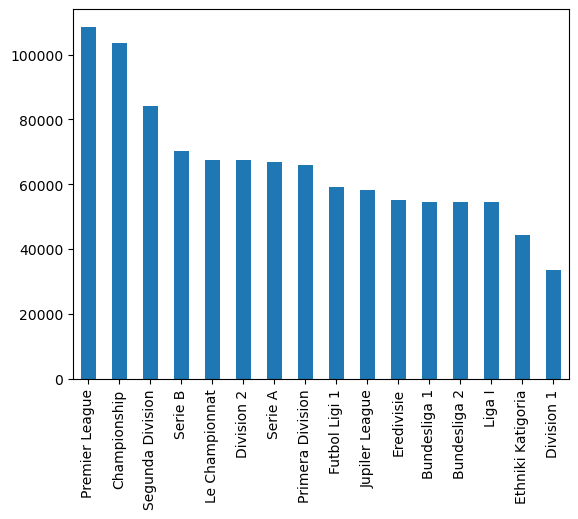

In [6]:
l = df['League'].value_counts()
print(l)
l.plot(kind='bar')

# Plotting the league teams according to the number of their participation in a particular season, starting from the 2012-2013 season (The order does not mean that it is 100% correct because some data is missing)

In [7]:
import matplotlib.pyplot as plt
def league_teams(league):
    teams=[]
    for i in range(0,len(df)):
        if df['League'][i] == league:
            teams.append(df['HomeTeam'][i])
    team_counts = pd.DataFrame(data=teams, columns=['Teams']).value_counts()
    team_counts = team_counts.reset_index()
    column_name = '{} Teams most played since 2012'.format(league)
    team_counts.columns = [column_name, 'Counts']
    team_counts = team_counts.plot(kind='bar',x=column_name,stacked=True, figsize=(17,5))

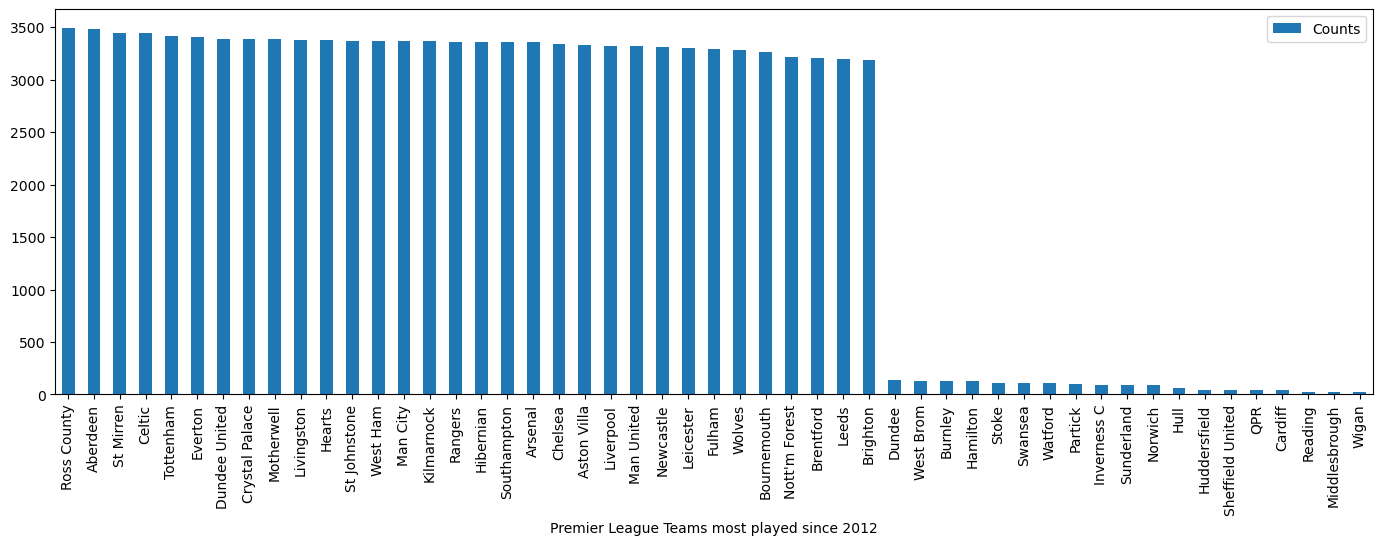

In [8]:
league_teams('Premier League')

# Replace H, A and D by home win, away win and draw

In [9]:
df['FTR'].replace('H', 'Home won', inplace=True)
df['FTR'].replace('A', 'Away won', inplace=True)
df['FTR'].replace('D', 'Draw', inplace=True)

# Search all matches and results of a specific team in a given season.

In [10]:
def search_team_result_in_season(season, team):
    result = df[(df['Season'] == season) & ((df['AwayTeam']==team) | (df['HomeTeam']==team))][['League','Season','HomeTeam','AwayTeam','FTR','FTHG','FTAG']]
    return result

In [11]:
search_team_result_in_season('2012-2013','Real Madrid')

,League,Season,HomeTeam,AwayTeam,FTR,FTHG,FTAG
9886,Primera Division,2012-2013,Real Madrid,Valencia,Draw,1.0,1.0
9894,Primera Division,2012-2013,Getafe,Real Madrid,Home won,2.0,1.0
9907,Primera Division,2012-2013,Real Madrid,Granada,Home won,3.0,0.0
9911,Primera Division,2012-2013,Sevilla,Real Madrid,Home won,1.0,0.0
9928,Primera Division,2012-2013,Vallecano,Real Madrid,Away won,0.0,2.0
9937,Primera Division,2012-2013,Real Madrid,La Coruna,Home won,5.0,1.0
9947,Primera Division,2012-2013,Barcelona,Real Madrid,Draw,2.0,2.0
9952,Primera Division,2012-2013,Real Madrid,Celta,Home won,2.0,0.0
9967,Primera Division,2012-2013,Mallorca,Real Madrid,Away won,0.0,5.0
9972,Primera Division,2012-2013,Real Madrid,Zaragoza,Home won,4.0,0.0


# Plotting results of a specific team in a given season.

In [12]:
def plot_team_result_in_season(season, team):
    home = df[(df['HomeTeam'] == team) & (df['Season'] == season)]['FTR'].value_counts()
    away = df[(df['AwayTeam'] == team) & (df['Season'] == season)]['FTR'].value_counts()
    ploting = pd.DataFrame([home,away],['home','away'])
    ploting.plot(kind='bar', title = f'{team} result in {season}', stacked=True, figsize=(7,4))

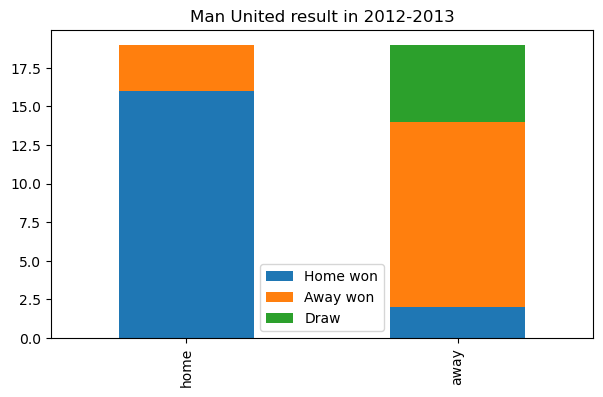

In [13]:
plot_team_result_in_season('2012-2013','Man United')

# Plotting home matches goals

In [14]:
import seaborn as sns
def home_goals_in_season(team, season):
    date = []
    goals = []
    total_shots = []
    shot_target = []
    corners = []

    for i in range(0,len(df)):
        if (df['HomeTeam'][i] == team) & (df['Season'][i] == season):
            date.append(df['Date'][i])
            goals.append(df['FTHG'][i])
            total_shots.append(df['HS'][i])
            shot_target.append(df['HST'][i])
            corners.append(df['HC'][i])

        if i == len(df)-1:
            goals_data = {'Date':date, 'Home goals':goals, 'Home total shots':total_shots, 
                         'Home shot on target':shot_target, 'Home team corners':corners}
            home_goals = pd.DataFrame(goals_data).set_index('Date')
            sns.set_style('dark')
            plt.figure(figsize=(18,8))
            plt.title(f'{team} home goals in {season}')
            sns.lineplot(data=home_goals)

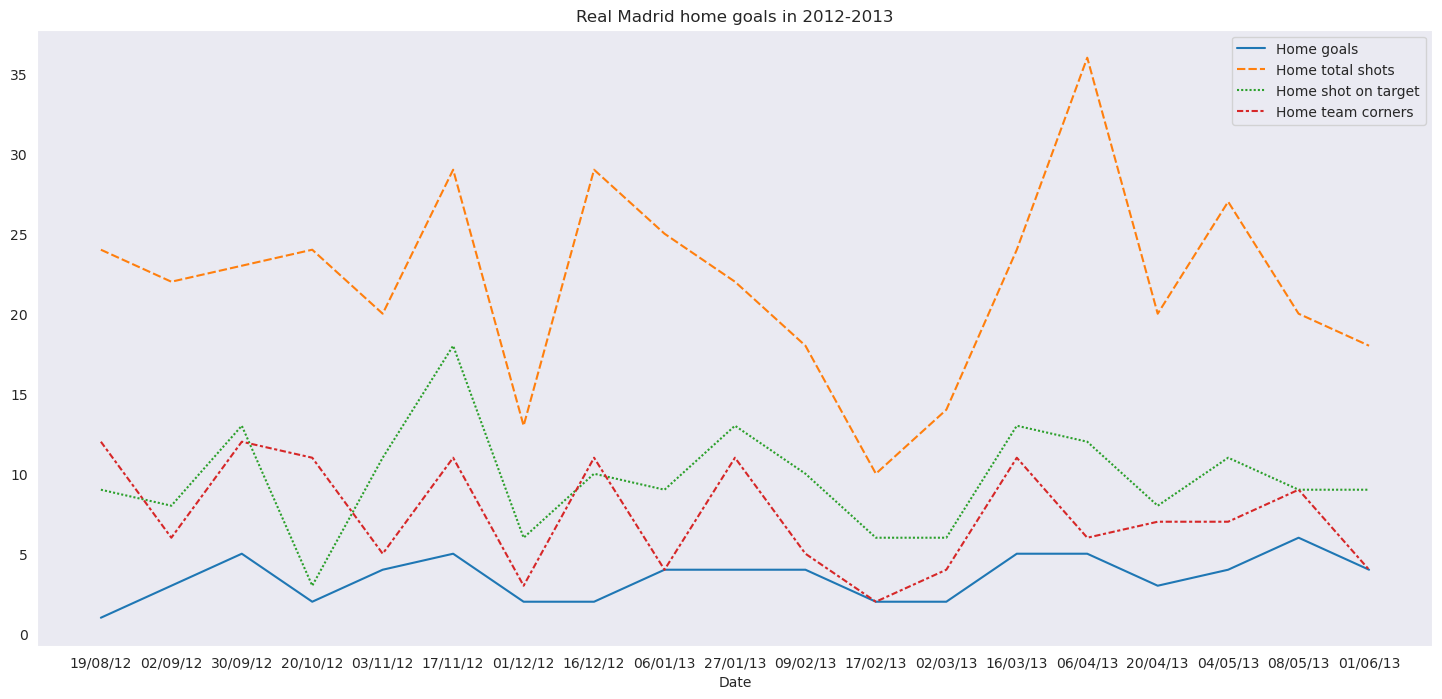

In [15]:
home_goals_in_season('Real Madrid','2012-2013')

# Plotting away matches result

In [16]:
def away_goals_in_season(team, season):
    date = []
    goals = []
    total_shots = []
    shot_target = []
    corners = []

    for i in range(0,len(df)):
        if (df['AwayTeam'][i] == team) & (df['Season'][i] == season):
            date.append(df['Date'][i])
            goals.append(df['FTAG'][i])
            total_shots.append(df['AS'][i])
            shot_target.append(df['AST'][i])
            corners.append(df['AC'][i])
            
        if i == len(df)-1:
            goals_data = {'Date':date, 'Away goals':goals, 'Away total shots':total_shots, 
                         'Away shot on target':shot_target, 'Away team corners':corners}
            away_goals = pd.DataFrame(goals_data).set_index('Date')
            sns.set_style('dark')
            plt.figure(figsize=(20,8))
            plt.title(f'{team} away goals in {season}')
            sns.lineplot(data=away_goals)

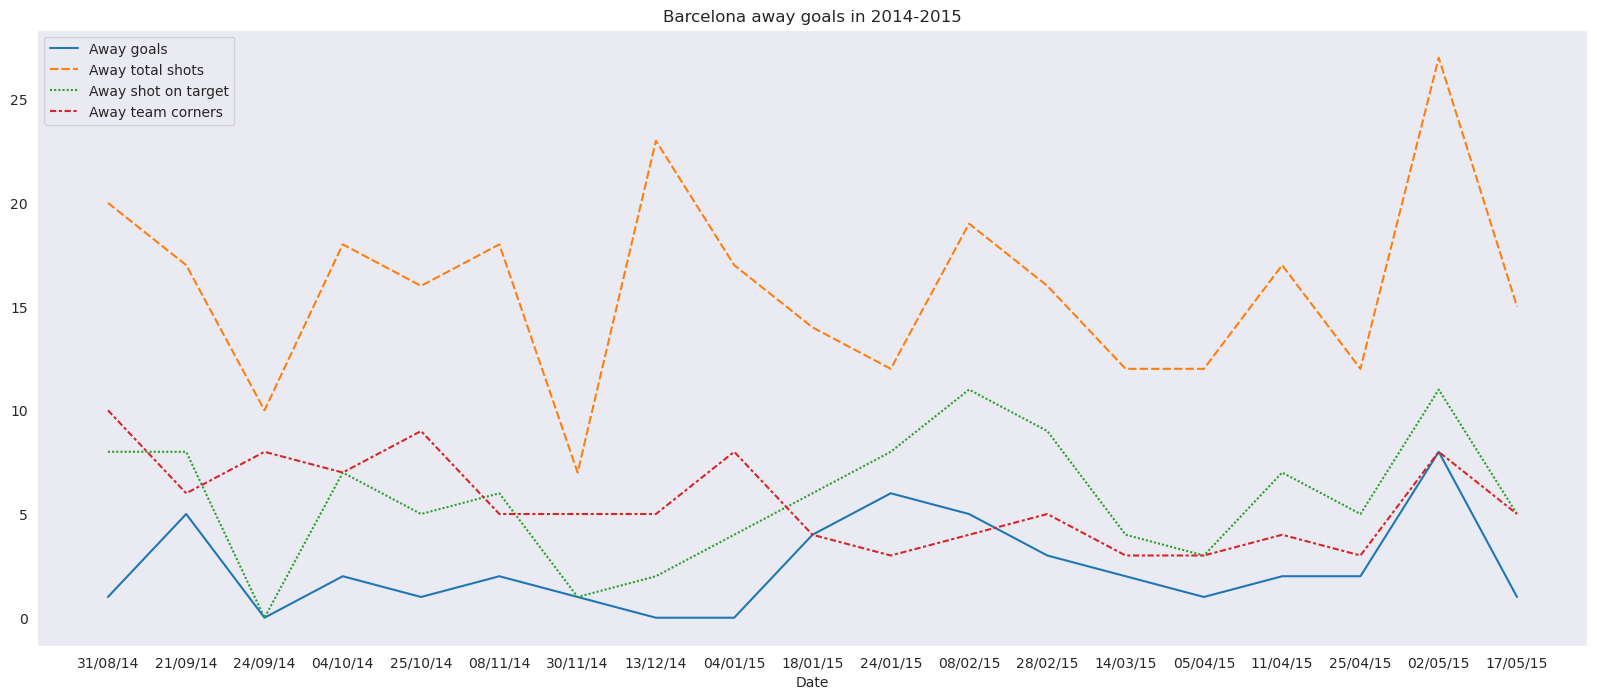

In [17]:
away_goals_in_season('Barcelona','2014-2015')

# Home matches fouls, yellow cards and yellow cards

In [18]:
def home_fouls(team, season):
    date = []
    fouls = []
    yellow_card = []
    red_card = []
    
    for i in range(0,len(df)):
        if (df['HomeTeam'][i] == team) & (df['Season'][i] == season):
            date.append(df['Date'][i])
            fouls.append(df['HF'][i])
            yellow_card.append(df['HY'][i])
            red_card.append(df['HR'][i])
        if i == len(df)-1:
            fouls_data = {'Date':date, 'Fouls':fouls, 'Yellow card':yellow_card, 'Red card':red_card}
            home_fouls = pd.DataFrame(fouls_data).set_index('Date')
            sns.set_style('dark')
            plt.figure(figsize=(20,8))
            plt.title(f'{team} home fouls in {season}')
            sns.lineplot(home_fouls)

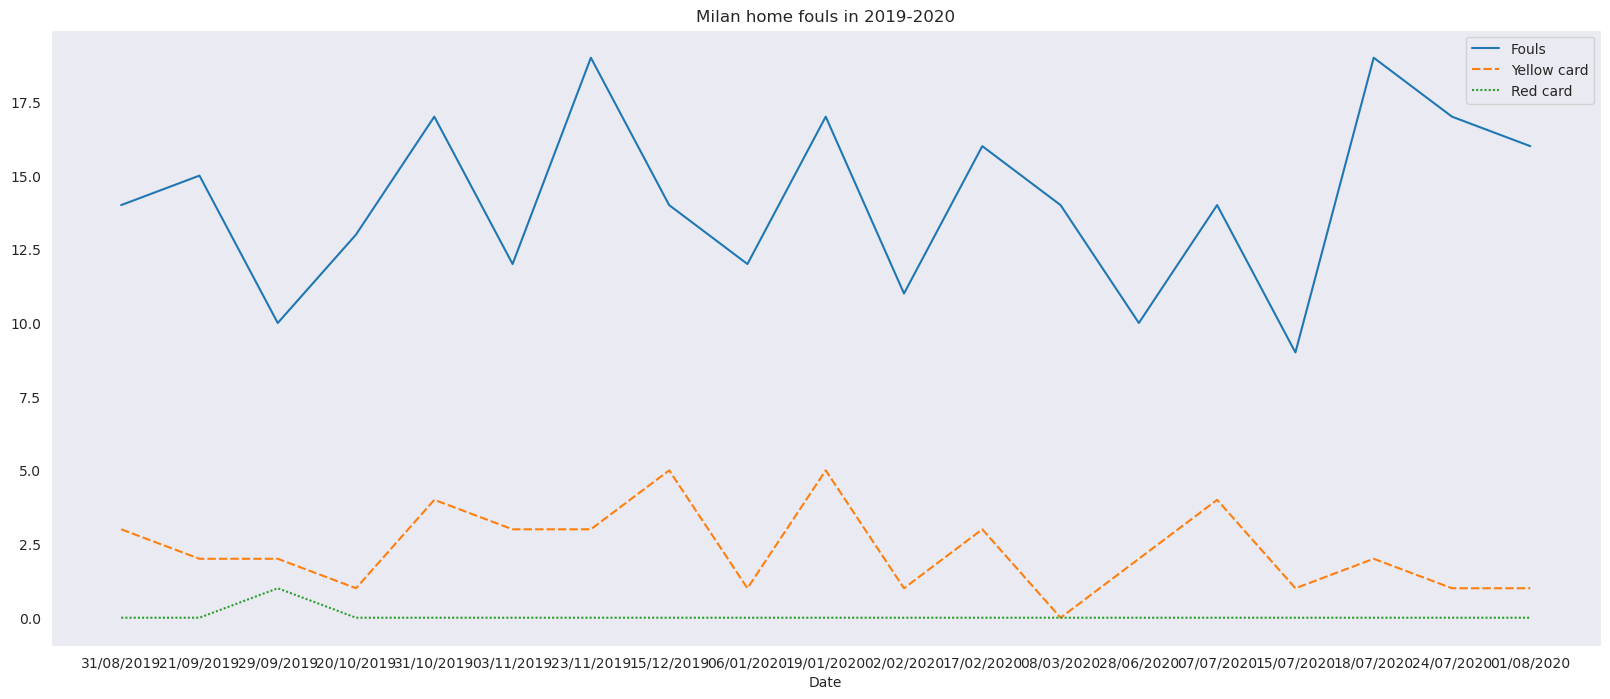

In [19]:
home_fouls('Milan', '2019-2020')

# Away matches fouls, yellow cards and yellow cards

In [20]:
def away_fouls(team, season):
    date = []
    fouls = []
    yellow_card = []
    red_card = []
    
    for i in range(0,len(df)):
        if (df['AwayTeam'][i] == team) & (df['Season'][i] == season):
            date.append(df['Date'][i])
            fouls.append(df['AF'][i])
            yellow_card.append(df['AY'][i])
            red_card.append(df['AR'][i])
        if i == len(df)-1:
            fouls_data = {'Date':date, 'Fouls':fouls, 'Yellow card':yellow_card, 'Red card':red_card}
            away_fouls = pd.DataFrame(fouls_data).set_index('Date')
            sns.set_style('dark')
            plt.figure(figsize=(20,8))
            plt.title(f'{team} away fouls in {season}')
            sns.lineplot(away_fouls)

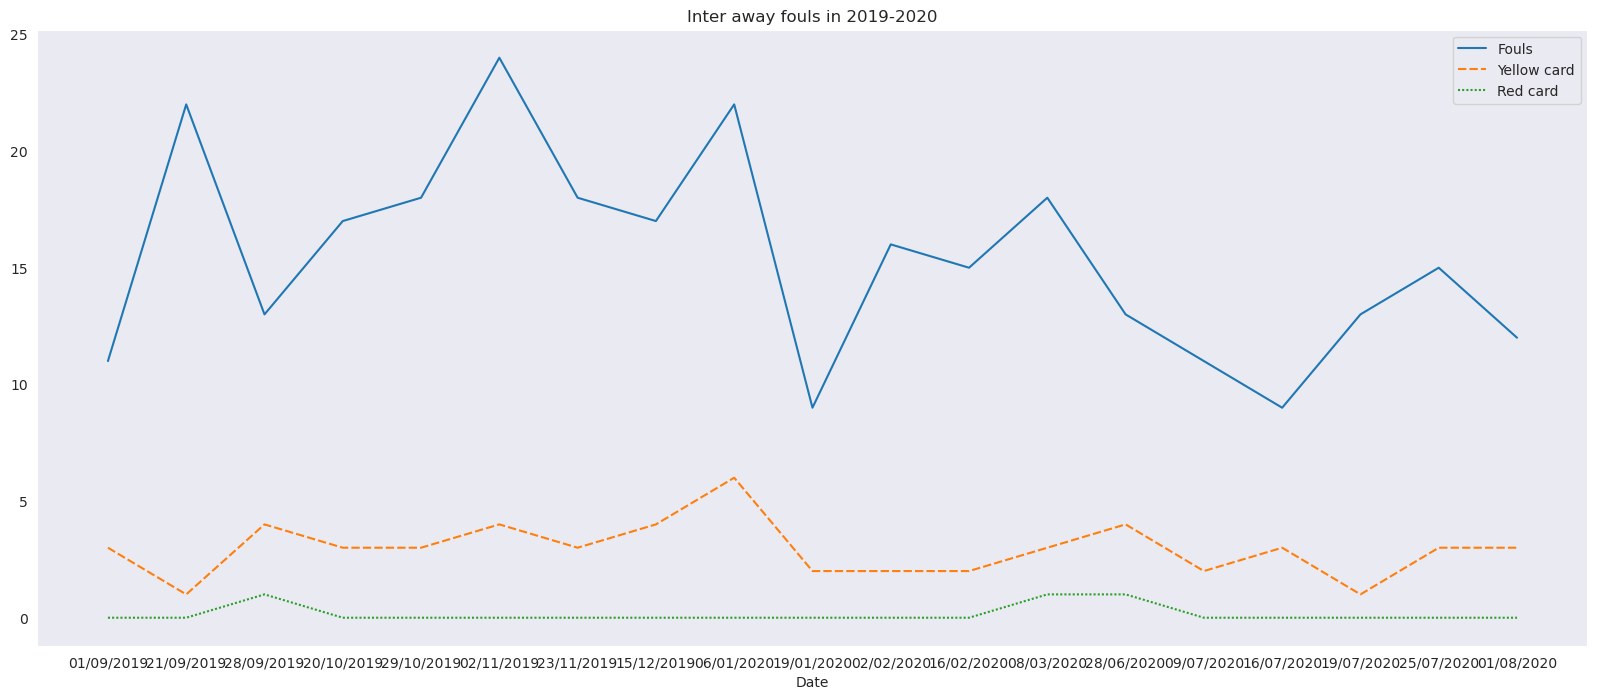

In [21]:
away_fouls('Inter', '2019-2020')

In [22]:
def referee_red_card(season):
    x=df[((df['HR']==1.0) | (df['AR']==1.0)) & (df['Season']=='2012-2013')]['Referee'].value_counts()
    x.plot(kind='bar', stacked=True, title=f'Refree who gives red card of {season}',figsize=(10,5))

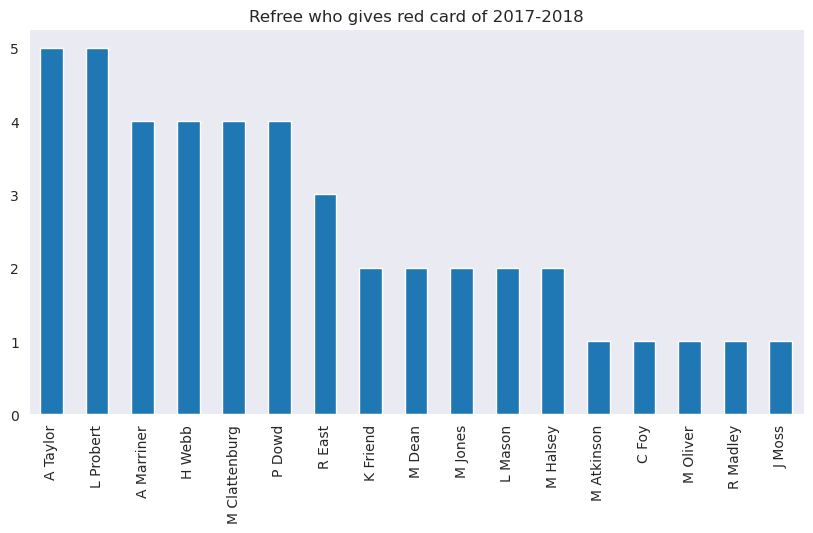

In [23]:
referee_red_card('2017-2018')